In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")


In [149]:
data=pd.read_csv('wdbc.data',header=None)
headers=['id','diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension','worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']
data.to_csv('labeledData.csv',header=headers,index=False)
data=pd.read_csv('labeledData.csv')

data.head()

In [150]:
data.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [151]:
def diag(z):
    if z=='M':
        return 1
    else:
        return 0
z=data['diagnosis'].apply(diag)
data.diagnosis=z

In [152]:
df=pd.DataFrame(data=data)
df=df.drop('id',axis=1)
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [153]:
x_scaled=x.apply(zscore)
x_scaled.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [154]:

pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [155]:

x_scaled.describe()




,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [156]:
from sklearn.decomposition import PCA
components=None
pca=PCA(n_components=components)
pca.fit(x_scaled)

PCA()

In [157]:
print('Cumulative Variances Percentage:')
print(pca.explained_variance_ratio_.cumsum()*100)

Cumulative Variances Percentage:
[ 44.27202561  63.24320765  72.63637091  79.23850582  84.73427432
  88.75879636  91.00953007  92.59825387  93.98790324  95.15688143
  96.13660042  97.00713832  97.81166331  98.33502905  98.64881227
  98.91502161  99.1130184   99.28841435  99.45333965  99.55720433
  99.65711397  99.74857865  99.82971477  99.88989813  99.94150237
  99.96876117  99.99176271  99.99706051  99.99955652 100.        ]


Text(0, 0.5, 'Explained variance(%)')

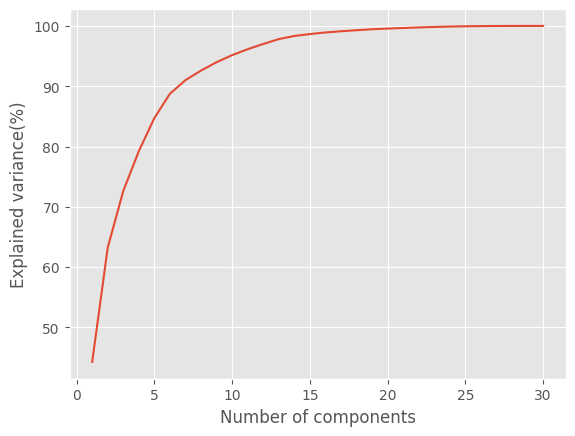

In [158]:
components=len(pca.explained_variance_ratio_)\
if components is None else components
plt.plot(range(1,components+1),
np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance(%)')

Cumulative Variances (Percentage):
[44.27202561 63.24320765 72.63637091 79.23850582 84.73427432 88.75879636]
Number of components:6


Text(0, 0.5, 'Explained Variance (%)')

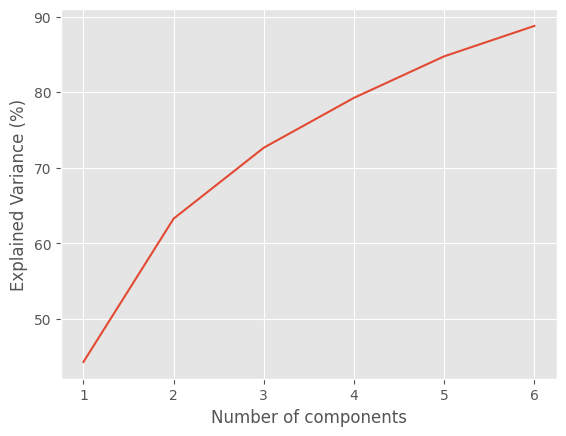

In [159]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=0.85)
pca.fit(x_scaled)
print('Cumulative Variances (Percentage):')
print(np.cumsum(pca.explained_variance_ratio_*100))
components=len(pca.explained_variance_ratio_)
print(f'Number of components:{components}')
plt.plot(range(1,components+1),
np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance (%)')

In [160]:
pca_components=abs(pca.components_)
print(pca_components)

[[2.18902444e-01 1.03724578e-01 2.27537293e-01 2.20994985e-01
  1.42589694e-01 2.39285354e-01 2.58400481e-01 2.60853758e-01
  1.38166959e-01 6.43633464e-02 2.05978776e-01 1.74280281e-02
  2.11325916e-01 2.02869635e-01 1.45314521e-02 1.70393451e-01
  1.53589790e-01 1.83417397e-01 4.24984216e-02 1.02568322e-01
  2.27996634e-01 1.04469325e-01 2.36639681e-01 2.24870533e-01
  1.27952561e-01 2.10095880e-01 2.28767533e-01 2.50885971e-01
  1.22904556e-01 1.31783943e-01]
 [2.33857132e-01 5.97060883e-02 2.15181361e-01 2.31076711e-01
  1.86113023e-01 1.51891610e-01 6.01653628e-02 3.47675005e-02
  1.90348770e-01 3.66575471e-01 1.05552152e-01 8.99796818e-02
  8.94572342e-02 1.52292628e-01 2.04430453e-01 2.32715896e-01
  1.97207283e-01 1.30321560e-01 1.83848000e-01 2.80092027e-01
  2.19866379e-01 4.54672983e-02 1.99878428e-01 2.19351858e-01
  1.72304352e-01 1.43593173e-01 9.79641143e-02 8.25723507e-03
  1.41883349e-01 2.75339469e-01]
 [8.53124284e-03 6.45499033e-02 9.31421972e-03 2.86995259e-02
  1.

In [161]:
newdf=df.drop('diagnosis',axis=1)
print('Top 4 most important features in each component')

for row in range(pca_components.shape[0]):
    # get the indices of the top 6 values in each row
    temp = np.argpartition(-(pca_components[row]),4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
 
    print(f'Component {row}: {newdf.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['mean_concave points', 'mean_concavity', 'worst_concave points', 'mean_compactness']
Component 1: ['mean_fractal dimension', 'SE_fractal dimension', 'worst_fractal dimension', 'mean_radius']
Component 2: ['SE_texture', 'SE_smoothness', 'SE_symmetry', 'worst_symmetry']
Component 3: ['worst_texture', 'mean_texture', 'SE_texture', 'mean_smoothness']
Component 4: ['mean_smoothness', 'SE_concavity', 'worst_smoothness', 'mean_symmetry']
Component 5: ['worst_symmetry', 'SE_symmetry', 'worst_smoothness', 'mean_symmetry']


In [162]:
x_pca=pca.transform(x_scaled)
x_pca=pd.DataFrame(data=x_pca)
print(x_pca.shape)
print(x_pca)

(569, 6)
             0          1         2         3         4         5
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422
4     3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495
..         ...        ...       ...       ...       ...       ...
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193
565   3.793382  -3.584048  2.088476 -2.506028 -0.510723 -0.246710
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837

[569 rows x 6 columns]


In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
random_state=42
x_train,x_test,y_train,y_test=\
train_test_split(x_scaled,y,test_size=0.3,shuffle=True,random_state=random_state)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.9824561403508771

Accuracy is: 0.9824561403508771


<Axes: >

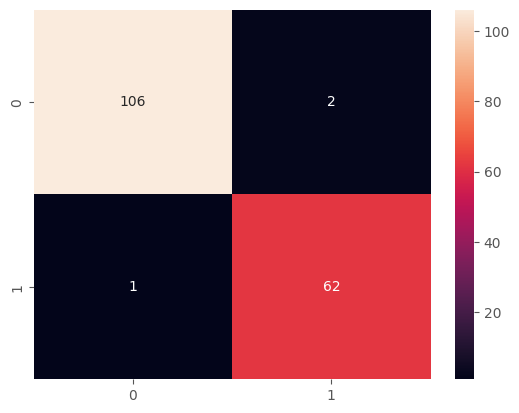

In [164]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,log_reg.predict(x_test))
print('Accuracy is:',acc)
cm=confusion_matrix(y_test,log_reg.predict(x_test))
sns.heatmap(cm,annot=True,fmt='d')

In [165]:
random_state=42
x_pca_train,x_pca_test,y_pca_train,y_pca_test=\
train_test_split(x_pca,y,test_size=0.3,shuffle=True,random_state=random_state)
log_reg_pca=LogisticRegression()
log_reg_pca.fit(x_pca_train,y_pca_train)
y_pred=log_reg_pca.predict(x_pca_test)
log_reg_pca.score(x_pca_test,y_pca_test)

0.9883040935672515

Accuracy is: 0.9883040935672515


<Axes: >

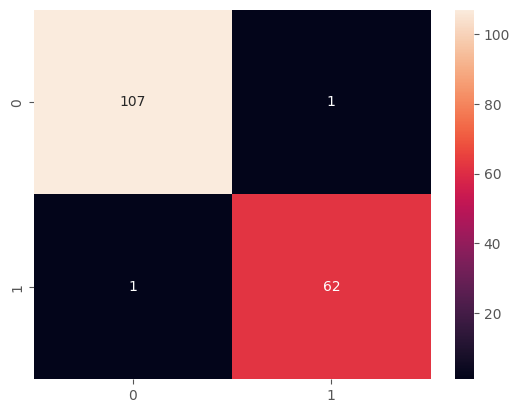

In [166]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
acc_pca=accuracy_score(y_pca_test,log_reg_pca.predict(x_pca_test))
print('Accuracy is:',acc_pca)
cm=confusion_matrix(y_pca_test,log_reg_pca.predict(x_pca_test))
sns.heatmap(cm,annot=True,fmt='d')

In [167]:

y_pred=log_reg_pca.predict(x_pca_test)
false_negatives=np.logical_and(y_pca_test!=y_pred,y_pred==0)
x_pca_test[false_negatives]


,0,1,2,3,4,5
73,-0.361709,0.119739,-2.040956,1.058884,0.757109,-0.920448


In [168]:
true_negatives=np.logical_and(y_pca_test==y_pred,y_pred==0)
x_pca_test[true_negatives]

,0,1,2,3,4,5
204,-0.781190,0.652849,-0.643657,0.214468,-0.437680,-0.160489
431,-0.915804,2.479013,0.362607,0.261967,0.138472,-0.991236
540,-1.665475,2.389618,1.502249,0.875951,0.484546,-1.189518
81,1.167462,2.514516,-1.905719,0.638312,0.236181,0.138134
477,-3.172370,-2.089052,-0.978806,0.387097,1.419476,1.338365
...,...,...,...,...,...,...
426,-1.283187,2.550909,-0.083860,0.771512,0.556911,0.270002
69,-3.261279,-0.937838,0.205130,1.090072,-0.460350,-0.434329
542,-1.300930,-1.821415,0.373307,-1.848169,0.199627,0.765754
176,1.170898,7.014487,4.271862,-0.332640,2.909445,-0.389148


In [169]:
frames=[x_pca_test[false_negatives],x_pca_test[true_negatives]]
pred_neg=pd.concat(frames)
pred_neg

,0,1,2,3,4,5
73,-0.361709,0.119739,-2.040956,1.058884,0.757109,-0.920448
204,-0.781190,0.652849,-0.643657,0.214468,-0.437680,-0.160489
431,-0.915804,2.479013,0.362607,0.261967,0.138472,-0.991236
540,-1.665475,2.389618,1.502249,0.875951,0.484546,-1.189518
81,1.167462,2.514516,-1.905719,0.638312,0.236181,0.138134
...,...,...,...,...,...,...
426,-1.283187,2.550909,-0.083860,0.771512,0.556911,0.270002
69,-3.261279,-0.937838,0.205130,1.090072,-0.460350,-0.434329
542,-1.300930,-1.821415,0.373307,-1.848169,0.199627,0.765754
176,1.170898,7.014487,4.271862,-0.332640,2.909445,-0.389148


In [170]:
stacks=[y_pca_test[false_negatives],y_pca_test[true_negatives]]
y_labels=np.hstack(stacks)
y_labels.shape
print(y_labels)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [171]:
new_df=pd.DataFrame(data=pred_neg)
new_df['diagnosis']=y_labels
new_df.shape
new_df.head()

,0,1,2,3,4,5,diagnosis
73,-0.361709,0.119739,-2.040956,1.058884,0.757109,-0.920448,1
204,-0.781190,0.652849,-0.643657,0.214468,-0.437680,-0.160489,0
431,-0.915804,2.479013,0.362607,0.261967,0.138472,-0.991236,0
540,-1.665475,2.389618,1.502249,0.875951,0.484546,-1.189518,0
81,1.167462,2.514516,-1.905719,0.638312,0.236181,0.138134,0


In [172]:
new_df['diagnosis'].value_counts()

diagnosis
0    107
1      1
Name: count, dtype: int64

In [191]:
new_df.head()


,0,2,3,4,5,diagnosis
73,-0.361709,-2.040956,1.058884,0.757109,-0.920448,1
204,-0.781190,-0.643657,0.214468,-0.437680,-0.160489,0
431,-0.915804,0.362607,0.261967,0.138472,-0.991236,0
540,-1.665475,1.502249,0.875951,0.484546,-1.189518,0
81,1.167462,-1.905719,0.638312,0.236181,0.138134,0


In [201]:
x_new=new_df.drop(['diagnosis'],axis=1)
y_new=new_df.diagnosis
y_new.value_counts()


diagnosis
0    107
1      1
Name: count, dtype: int64

In [202]:
x_new.head()

,0,2,3,4,5
73,-0.361709,-2.040956,1.058884,0.757109,-0.920448
204,-0.781190,-0.643657,0.214468,-0.437680,-0.160489
431,-0.915804,0.362607,0.261967,0.138472,-0.991236
540,-1.665475,1.502249,0.875951,0.484546,-1.189518
81,1.167462,-1.905719,0.638312,0.236181,0.138134


In [203]:
y_new.head()

73     1
204    0
431    0
540    0
81     0
Name: diagnosis, dtype: int64

In [204]:
new_df_corr=new_df.corr()['diagnosis'].abs().sort_values(ascending=False)
new_df_corr

diagnosis    1.000000
2            0.144790
0            0.111248
5            0.103084
3            0.065245
4            0.054864
Name: diagnosis, dtype: float64

In [205]:
features=new_df_corr[new_df_corr>0.1].index.to_list()[1:]
features

[2, 0, 5]

In [206]:
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        x = [f for f in features if f != feature]        
        x, y = df[x], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(x, y).score(x, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(new_df,features)

,VIF,Tolerance
2,1.010225,0.989878
0,1.007177,0.992874
5,1.016517,0.983752


In [208]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.1,random_state=42)
log_reg_FN=LogisticRegression()
log_reg_FN=log_reg_FN.fit(x_train,y_train)

In [209]:
log_reg_FN.score(x_test,y_test)

1.0

Confusion Matrix


<Axes: >

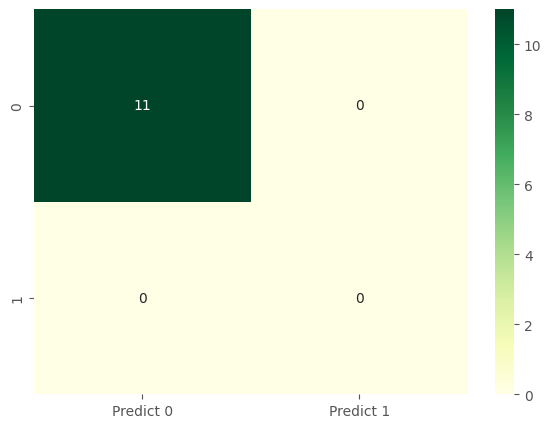

In [210]:
y_pred=log_reg_FN.predict(x_test)
from sklearn import metrics
print('Confusion Matrix')
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in [0,1]],
                   columns=[i for i in ['Predict 0','Predict 1']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='.5g',cmap='YlGn')